In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# Загрузка данных (замените путь на актуальный)
cntrbtrs_clnts_ops = pd.read_csv('train_data/cntrbtrs_clnts_ops_trn.csv', encoding='windows-1251', sep=';', low_memory=False)
trnsctns_ops = pd.read_csv('train_data/trnsctns_ops_trn.csv', encoding='windows-1251', sep=';')
cntrbtrs_clnts_ops_old = cntrbtrs_clnts_ops.copy(deep=True)
trnsctns_ops_old = trnsctns_ops.copy(deep=True)

print()

# Обработка пропусков: добавим индикаторы для некоторых столбцов и заменим NaN на 0 или "Unknown"
for col in ['brth_plc', 'email', 'phn']:
    cntrbtrs_clnts_ops[col + '_missing'] = cntrbtrs_clnts_ops[col].isna().astype(int)  # индикатор пропуска
    if cntrbtrs_clnts_ops[col].dtype == 'object':
        cntrbtrs_clnts_ops[col].fillna('Unknown', inplace=True)
    else:
        cntrbtrs_clnts_ops[col].fillna(0, inplace=True)

# Проверка итоговых данных
cntrbtrs_clnts_ops

C:\Users\gameo\AppData\Local\Temp\ipykernel_16344\1776729122.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cntrbtrs_clnts_ops[col].fillna('Unknown', inplace=True)
C:\Users\gameo\AppData\Local\Temp\ipykernel_16344\1776729122.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

,slctn_nmbr,clnt_id,accnt_id,gndr,brth_yr,prsnt_age,accnt_bgn_date,cprtn_prd_d,erly_pnsn_flg,accnt_status,...,pstl_code,okato,phn,email,lk,assgn_npo,assgn_ops,brth_plc_missing,email_missing,phn_missing
0,0,0x03ED62E56DAEA24B96D6F1252D713286,0xFFB14DE2D28AAD45B08AC54ADDFE6AD2,ж,1960,64,2005-12-21,96,0,Накопительный период,...,644001,5.200000e+10,нет,нет,нет,нет,нет,0,0,0
1,0,0x15138C4A822F1C45A819FCBE6657B810,0x222F5E5BA3715F418662A3C65B0B051F,м,1954,70,2009-06-29,283,0,Накопительный период,...,676852,1.000000e+10,нет,нет,нет,нет,нет,0,0,0
2,3,0x943D2C768A4FB38311E659ACF7E960C3,0x943D2C768A4FB38311E659ACF7E960C5,м,1955,69,2006-12-25,88,0,Накопительный период,...,109451,4.500000e+10,нет,нет,нет,нет,нет,0,0,0
3,2,0x9CAE18EC4F30054C83C6C78FF70D124A,0xB7BAA18DCFE2E842A7AF84BBE185265C,ж,1962,62,2013-09-03,1301,0,Накопительный период,...,423464,9.200000e+10,нет,нет,нет,нет,нет,0,0,0
4,2,0xCB416F5FE5D58E41822B4E9A5209747F,0x68D14914CF3A79408F6A6E097C1A61AF,м,1955,69,2010-12-06,106,0,Накопительный период,...,427415,9.400000e+10,нет,нет,нет,нет,нет,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532820,0,0x4F753559542C8D42923BA0452CB27595,0x3F27AA4D3F5D2145BE5BD14EA1C109E9,ж,1965,59,2013-12-23,490,0,Накопительный период,...,603070,2.200000e+10,нет,нет,нет,нет,нет,0,0,0
532821,3,0x943D2C768A4FB38311E65BA1D3F4228C,0x943D2C768A4FB38311E65BA1D3F4228E,м,1956,68,2008-05-28,307,0,Накопительный период,...,185030,8.600000e+10,нет,нет,нет,нет,нет,0,0,0
532822,0,0x35F03CB3F4E2564C88D8C511C3E2B999,0x8DF10E30BE38834793B5B0FA2A321FA4,м,1959,65,2010-12-15,97,0,Накопительный период,...,452155,8.000000e+10,нет,нет,нет,нет,нет,0,0,0
532823,0,0x1F9C3E2874FDCB43A6C8B5930C8C2C0E,0x2AF087405B415546B8936841391ACDD4,ж,1959,65,2010-11-03,139,0,Накопительный период,...,393761,6.800000e+10,нет,нет,нет,нет,нет,0,0,0


In [17]:
from datetime import datetime

# Рассчитаем текущий год
current_year = datetime.now().year
# 1. Возраст клиента при заключении договора

cntrbtrs_clnts_ops['accnt_bgn_date'] = pd.to_datetime(cntrbtrs_clnts_ops['accnt_bgn_date'], errors='coerce')
cntrbtrs_clnts_ops['age_at_contract'] = cntrbtrs_clnts_ops['prsnt_age'] - ((current_year - cntrbtrs_clnts_ops['accnt_bgn_date'].dt.year).fillna(0))


In [18]:
cntrbtrs_clnts_ops

,slctn_nmbr,clnt_id,accnt_id,gndr,brth_yr,prsnt_age,accnt_bgn_date,cprtn_prd_d,erly_pnsn_flg,accnt_status,...,okato,phn,email,lk,assgn_npo,assgn_ops,brth_plc_missing,email_missing,phn_missing,age_at_contract
0,0,0x03ED62E56DAEA24B96D6F1252D713286,0xFFB14DE2D28AAD45B08AC54ADDFE6AD2,ж,1960,64,2005-12-21,96,0,Накопительный период,...,5.200000e+10,нет,нет,нет,нет,нет,0,0,0,45
1,0,0x15138C4A822F1C45A819FCBE6657B810,0x222F5E5BA3715F418662A3C65B0B051F,м,1954,70,2009-06-29,283,0,Накопительный период,...,1.000000e+10,нет,нет,нет,нет,нет,0,0,0,55
2,3,0x943D2C768A4FB38311E659ACF7E960C3,0x943D2C768A4FB38311E659ACF7E960C5,м,1955,69,2006-12-25,88,0,Накопительный период,...,4.500000e+10,нет,нет,нет,нет,нет,0,0,0,51
3,2,0x9CAE18EC4F30054C83C6C78FF70D124A,0xB7BAA18DCFE2E842A7AF84BBE185265C,ж,1962,62,2013-09-03,1301,0,Накопительный период,...,9.200000e+10,нет,нет,нет,нет,нет,0,0,0,51
4,2,0xCB416F5FE5D58E41822B4E9A5209747F,0x68D14914CF3A79408F6A6E097C1A61AF,м,1955,69,2010-12-06,106,0,Накопительный период,...,9.400000e+10,нет,нет,нет,нет,нет,0,0,0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532820,0,0x4F753559542C8D42923BA0452CB27595,0x3F27AA4D3F5D2145BE5BD14EA1C109E9,ж,1965,59,2013-12-23,490,0,Накопительный период,...,2.200000e+10,нет,нет,нет,нет,нет,0,0,0,48
532821,3,0x943D2C768A4FB38311E65BA1D3F4228C,0x943D2C768A4FB38311E65BA1D3F4228E,м,1956,68,2008-05-28,307,0,Накопительный период,...,8.600000e+10,нет,нет,нет,нет,нет,0,0,0,52
532822,0,0x35F03CB3F4E2564C88D8C511C3E2B999,0x8DF10E30BE38834793B5B0FA2A321FA4,м,1959,65,2010-12-15,97,0,Накопительный период,...,8.000000e+10,нет,нет,нет,нет,нет,0,0,0,51
532823,0,0x1F9C3E2874FDCB43A6C8B5930C8C2C0E,0x2AF087405B415546B8936841391ACDD4,ж,1959,65,2010-11-03,139,0,Накопительный период,...,6.800000e+10,нет,нет,нет,нет,нет,0,0,0,51


In [19]:
import seaborn as sns
# Настройки для визуализации
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

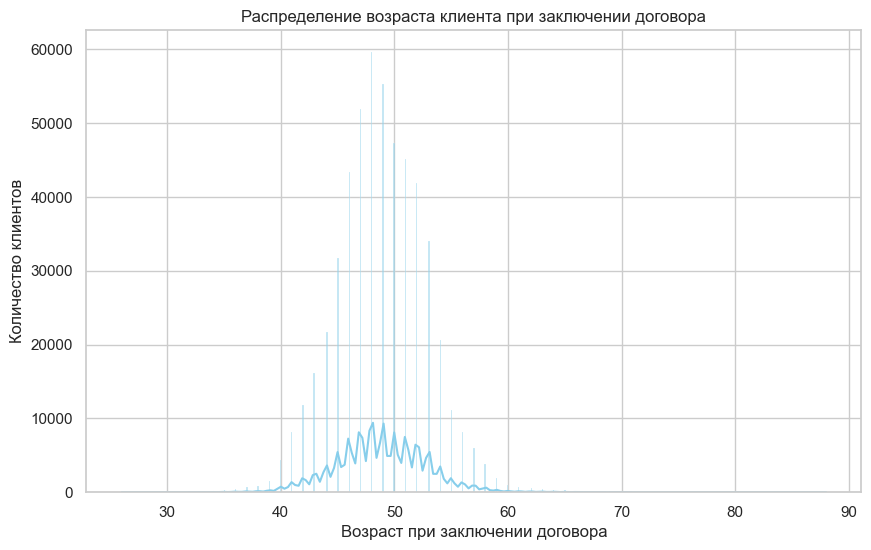

In [20]:
# 1. Гистограмма возраста клиента при заключении договора
plt.figure()
sns.histplot(cntrbtrs_clnts_ops['age_at_contract'], kde=True, color='skyblue')
plt.title("Распределение возраста клиента при заключении договора")
plt.xlabel("Возраст при заключении договора")
plt.ylabel("Количество клиентов")
plt.show()

In [21]:
# 2. Соотношение возраста клиента при заключении договора с законодательным возрастом выхода на пенсию
cntrbtrs_clnts_ops['age_vs_pension'] = cntrbtrs_clnts_ops['age_at_contract'] - cntrbtrs_clnts_ops['pnsn_age']

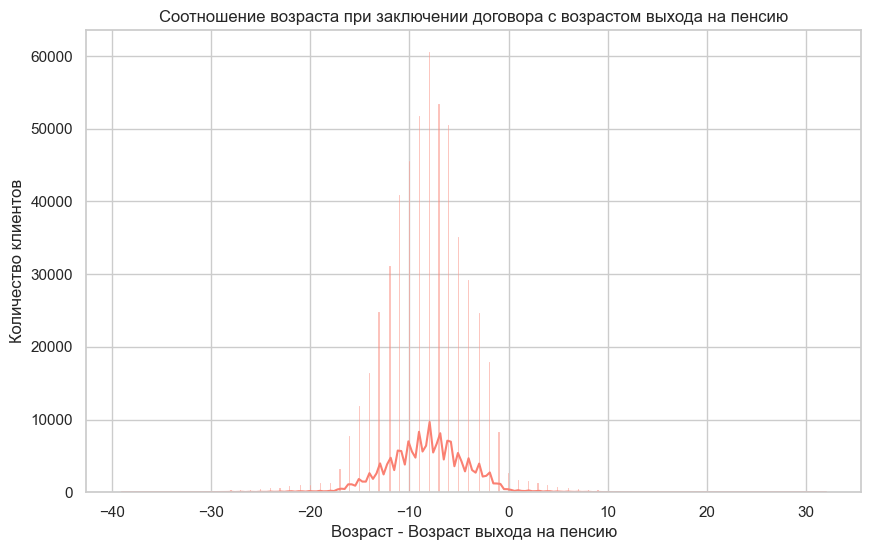

In [22]:
# 2. Соотношение возраста при заключении договора и возраста выхода на пенсию
plt.figure()
sns.histplot(cntrbtrs_clnts_ops['age_vs_pension'], kde=True, color='salmon')
plt.title("Соотношение возраста при заключении договора с возрастом выхода на пенсию")
plt.xlabel("Возраст - Возраст выхода на пенсию")
plt.ylabel("Количество клиентов")
plt.show()

In [23]:
# Функция для создания временных окон
def aggregate_transactions(df, period='3M'):
    df['oprtn_date'] = pd.to_datetime(df['oprtn_date'], errors='coerce')
    recent_transactions = df[df['oprtn_date'] > (datetime.now() - pd.DateOffset(months=int(period[:-1])))]
    avg_sum = recent_transactions.groupby('accnt_id')['sum'].mean().fillna(0).rename(f'avg_sum_{period}')
    std_sum = recent_transactions.groupby('accnt_id')['sum'].std().fillna(0).rename(f'std_sum_{period}')
    freq = recent_transactions.groupby('accnt_id').size().rename(f'transaction_freq_{period}')
    return avg_sum, std_sum, freq

In [24]:
avg_sum_3m, std_sum_3m, freq_3m = aggregate_transactions(trnsctns_ops, '3M')
avg_sum_6m, std_sum_6m, freq_6m = aggregate_transactions(trnsctns_ops, '6M')

transaction_features = pd.DataFrame({
    'avg_sum_3M': avg_sum_3m,
    'std_sum_3M': std_sum_3m,
    'transaction_freq_3M': freq_3m,
    'avg_sum_6M': avg_sum_6m,
    'std_sum_6M': std_sum_6m,
    'transaction_freq_6M': freq_6m
})
transaction_features

,avg_sum_3M,std_sum_3M,transaction_freq_3M,avg_sum_6M,std_sum_6M,transaction_freq_6M
accnt_id,,,,,,
0x00011844C09E9D4B91A8C8664C09E4A3,NaN,NaN,NaN,42.585000,60.365706,2
0x00019FC8F6EE684280A68EF0F2345902,NaN,NaN,NaN,251.910000,0.000000,1
0x0003D188FDF02D44BC6DE77103353871,1769.345000,40.865580,6.0,1769.345000,40.865580,6
0x000BCFC6D27A594EAE169B8DB1EAF349,802.993333,608.682025,9.0,802.993333,608.682025,9
0x001AADF78BCF1E4AB86AD5E1A437AE6B,290.640000,0.000000,3.0,290.640000,0.000000,3
...,...,...,...,...,...,...
0xFFDE2CB1A749E24180113CE76A41F6D9,141.690000,106.274542,9.0,141.690000,106.274542,9
0xFFDE882493185947A6F6DB8C11E05AA5,472.040000,0.000000,3.0,472.040000,0.000000,3
0xFFE5016064575C49A11B78CECFDB5AA5,NaN,NaN,NaN,638.980000,0.000000,1


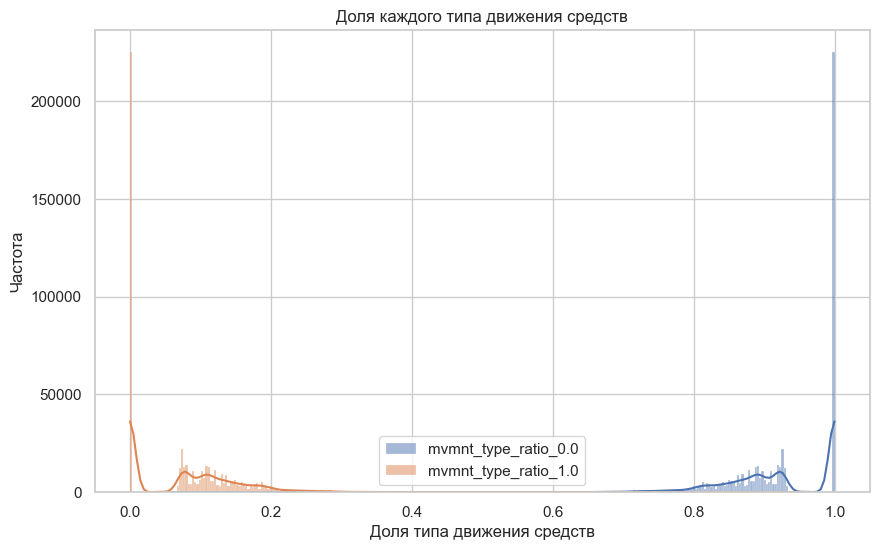

In [25]:
def calculate_movement_type_ratios(df):
    movement_counts = df.groupby(['accnt_id', 'mvmnt_type']).size().unstack(fill_value=0)
    movement_ratios = movement_counts.div(movement_counts.sum(axis=1), axis=0)
    movement_ratios = movement_ratios.add_prefix('mvmnt_type_ratio_')
    return movement_ratios

movement_type_ratios = calculate_movement_type_ratios(trnsctns_ops)

cntrbtrs_clnts_ops = cntrbtrs_clnts_ops.merge(movement_type_ratios, on='accnt_id', how='left')

# Visualization
plt.figure()
for col in movement_type_ratios.columns:
    sns.histplot(cntrbtrs_clnts_ops[col], kde=True, label=col)
plt.title("Доля каждого типа движения средств")
plt.xlabel("Доля типа движения средств")
plt.ylabel("Частота")
plt.legend()
plt.show()

In [26]:
cntrbtrs_clnts_ops = cntrbtrs_clnts_ops.merge(transaction_features, on='accnt_id', how='left')

cntrbtrs_clnts_ops

,slctn_nmbr,clnt_id,accnt_id,gndr,brth_yr,prsnt_age,accnt_bgn_date,cprtn_prd_d,erly_pnsn_flg,accnt_status,...,age_at_contract,age_vs_pension,mvmnt_type_ratio_0.0,mvmnt_type_ratio_1.0,avg_sum_3M,std_sum_3M,transaction_freq_3M,avg_sum_6M,std_sum_6M,transaction_freq_6M
0,0,0x03ED62E56DAEA24B96D6F1252D713286,0xFFB14DE2D28AAD45B08AC54ADDFE6AD2,ж,1960,64,2005-12-21,96,0,Накопительный период,...,45,-10,0.892857,0.107143,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0x15138C4A822F1C45A819FCBE6657B810,0x222F5E5BA3715F418662A3C65B0B051F,м,1954,70,2009-06-29,283,0,Накопительный период,...,55,-5,0.911111,0.088889,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0x943D2C768A4FB38311E659ACF7E960C3,0x943D2C768A4FB38311E659ACF7E960C5,м,1955,69,2006-12-25,88,0,Накопительный период,...,51,-9,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
3,2,0x9CAE18EC4F30054C83C6C78FF70D124A,0xB7BAA18DCFE2E842A7AF84BBE185265C,ж,1962,62,2013-09-03,1301,0,Накопительный период,...,51,-4,0.630435,0.369565,NaN,NaN,NaN,NaN,NaN,NaN
4,2,0xCB416F5FE5D58E41822B4E9A5209747F,0x68D14914CF3A79408F6A6E097C1A61AF,м,1955,69,2010-12-06,106,0,Накопительный период,...,55,-5,0.898305,0.101695,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532820,0,0x4F753559542C8D42923BA0452CB27595,0x3F27AA4D3F5D2145BE5BD14EA1C109E9,ж,1965,59,2013-12-23,490,0,Накопительный период,...,48,-8,0.744000,0.256000,NaN,NaN,NaN,NaN,NaN,NaN
532821,3,0x943D2C768A4FB38311E65BA1D3F4228C,0x943D2C768A4FB38311E65BA1D3F4228E,м,1956,68,2008-05-28,307,0,Накопительный период,...,52,-8,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
532822,0,0x35F03CB3F4E2564C88D8C511C3E2B999,0x8DF10E30BE38834793B5B0FA2A321FA4,м,1959,65,2010-12-15,97,0,Накопительный период,...,51,-9,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
532823,0,0x1F9C3E2874FDCB43A6C8B5930C8C2C0E,0x2AF087405B415546B8936841391ACDD4,ж,1959,65,2010-11-03,139,0,Накопительный период,...,51,-4,0.904762,0.095238,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
del trnsctns_ops
df = cntrbtrs_clnts_ops

In [28]:
import sklearn.utils
df = sklearn.utils.shuffle(df)

new_df = df.drop(columns=[
    'accnt_bgn_date', # Неизвестно о каком договоре речь, 
    'cprtn_prd_d', # Аналогично, при предсказании нам неизвестно какой из случаев мы обрабатываем
    # 'erly_pnsn_flg', # Это целевая величина, её нельзя использовать для предсказания
    'brth_yr', # Возраст человека однозначно определяет его год рождения
    
    # Эти параметры заменяет почтовый индекс
    'addrss_type', # Сложные строковый параметр
    'dstrct', # Множество пропусков
    'city', # Гигантское кол-во пропусков
    'sttlmnt', # Гигантское кол-во пропусков
    'brth_plc', # Большое кол-во различных категориональных призрнаков запутает модель
    
    'assgn_npo',
    'assgn_ops',
    
    'accnt_status', # Эти данные практически хранят ответ 
    'prvs_npf', # Эти данные врядли влияют на результат
    'slctn_nmbr', # Эта информация не помогает, поскольку о выборке нет дополнительной информации
    'clnt_id', # Модель не должна зависеть от id клиента 
    'accnt_id', 
    'phn', 'phn_missing',
    'email', 'email_missing',
    'lk', 'brth_plc_missing'
])

new_df = pd.get_dummies(new_df, columns=['gndr'], drop_first=True) 
new_df["gndr_м"] = new_df["gndr_м"].astype("int32")
new_df.rename(columns={"gndr_м": "gen"}, inplace=True)

for col in ['avg_sum_3M', "std_sum_3M", "transaction_freq_3M", "avg_sum_6M", "std_sum_6M", "transaction_freq_6M"]:
    new_df[col] = new_df[col].fillna(0)

for col in ['rgn']:
    new_df[col] = new_df[col].fillna("Unknown")

new_df.to_csv("train_data/marked_dataset.csv", encoding='windows-1251', sep=';')